# Exoplanets
### An Exoplanet is a planet that orbits a different star than our sun, and thus is outside of our solarsytem.
### Exoplanets have long captivated the imagination of SciFi writers and readers alike, but until relatively recently, we didn't even know whether other stars but our own had planets orbiting around them, and if so, how common they were.
### The first exoplanet candidate was described in 1989, and since then the rate of detection has increased significantly.

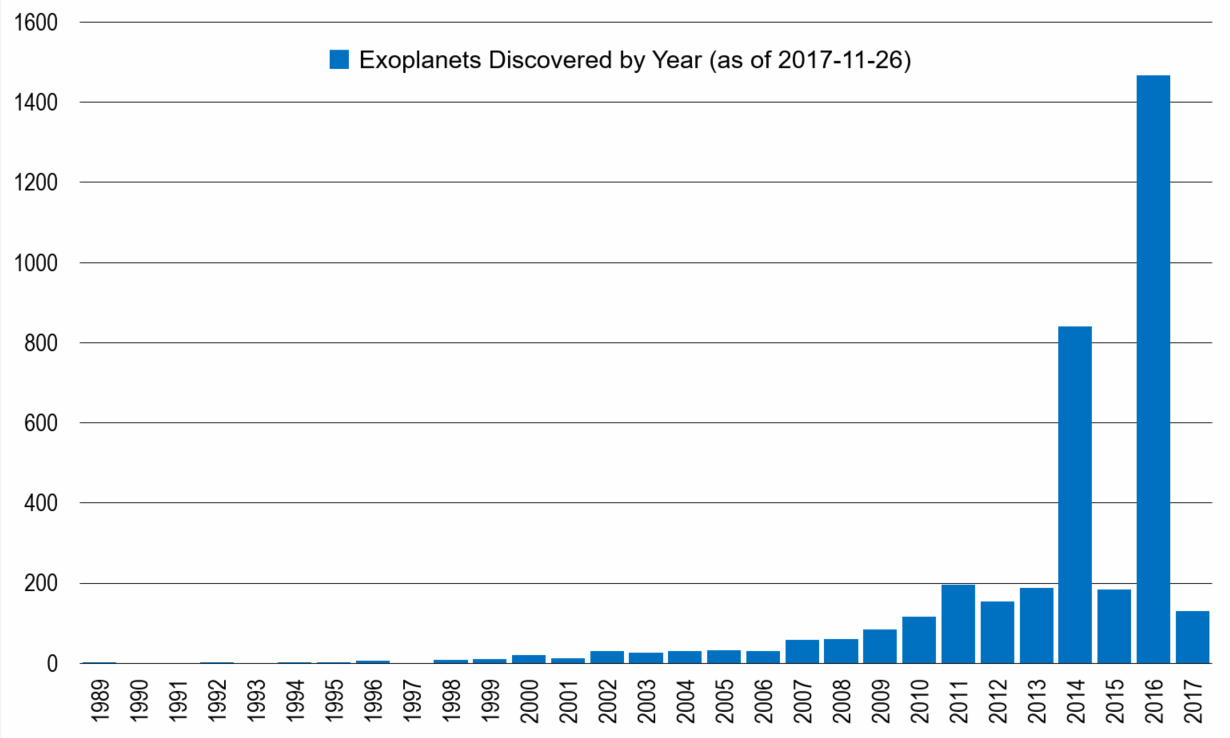

In [1]:
from IPython.display import Image
Image(filename = '/Users/gutzmannjj/Work/AnacondaProjects/final_project_exoplanets/Histogram_Chart_of_Discovered_Exoplanets_as_of_2017-11-26.png')
# data from Exoplanet.eu, via Wikipedia

In [2]:
Image(url = 'https://imgs.xkcd.com/comics/exoplanets.png') # from XKCD 1071

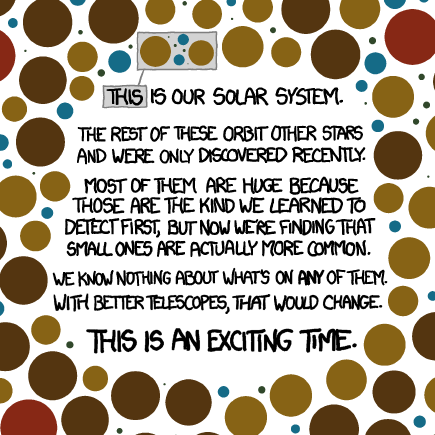

In [3]:
Image(filename = '/Users/gutzmannjj/Work/AnacondaProjects/final_project_exoplanets/exoplanets_large_zoom.png')

### Of course someone has made an interactive version of this chart, which can be found on [github](https://github.com/codementum/exoplanets)

# Exoplanet archives
### There are many exoplanet archives, and for no other reason than that their data was easily accessible as .csv, I chose the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/intro.html) hosted on the CalTech website.
## I had no particular goal in mind, other than that I was excited about exoplanets and wanted to know where we are with this now, and how soon we can move to Vulcan.

### Since I first downloaded this table a few weeks ago, 17 new planets have been added to the archive.

In [4]:
## importing the relevant and not relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
import re

# import sklearn as skl
# import xgboost as xgb
# import random
# random.seed(12345)

In [5]:
## establishing some astrophysiscs facts (taken from the Wikipedia pages of the respective planet)
# MMerc = 3.3011E23
# RadMerc = 2438
# print('Mercury mass over radius: '+str(MMerc/RadMerc))

# MVen = 4.8675E24
# RadVen = 6052
# print('\nVenus mass over radius: '+str(MVen/RadVen))
 
MEarth = 5.9724E24 # Mass of Earth in kg
RadEarth = 6371 # Radius of Earth in Km
# print('\nEarth mass over radius: '+str(MEarth/RadEarth))

# MMar = 6.4171E23
# RadMar = 3390
# print('\nMars mass over radius: '+str(MMar/RadMar))

MJup = 1.8982E27 # Mass of Jupiter in kg
RadJup = 66854 # Radius of Jupiter in Km
# print('\nJupiter mass over radius: '+str(MJup/RadJup))

# MSat = 5.6834E26
# RadSat = 58232
# print('\nSaturn mass over radius: '+str(MSat/RadSat))

# MUr = 8.6810E25
# RadUr = 25362
# print('\nUranus mass over radius: '+str(MUr/RadUr))

# MNep = 1.0243E26
# RadNep = 24622
# print('\nNeptune mass over radius: '+str(MNep/RadNep))

# MPlu = 1.303E22
# RadPlu = 1188
# print('\nPluto mass over radius: '+str(MPlu/RadPlu))

Parsec = 3.26156 # one parsec in light years

In [6]:
## reading the data from the csv-file
planets_raw = pd.read_csv('planets.csv', index_col=0, header=73)
planets = pd.read_csv('planets.csv', index_col=0, header=73)

In [7]:
## reducing the number of feature columns

# Deleting columns that, instead of a unique feature, contain the measurement errors of another feature
for i in planets.dtypes.index:
    if re.findall(r"err",i) != []:
        del planets[i]

# Calculating the percent missing values(NaN) for each column
nan = planets.isnull().sum()/len(planets)*100

# Deleting columns with too many missing values (cutoff is 75%)
before=planets.shape
for i in range(len(nan)):
    if nan[i]>75.0:
#         print(nan.index[i]+'  '+str(nan[i]))
        del planets[nan.index[i]]
after=planets.shape


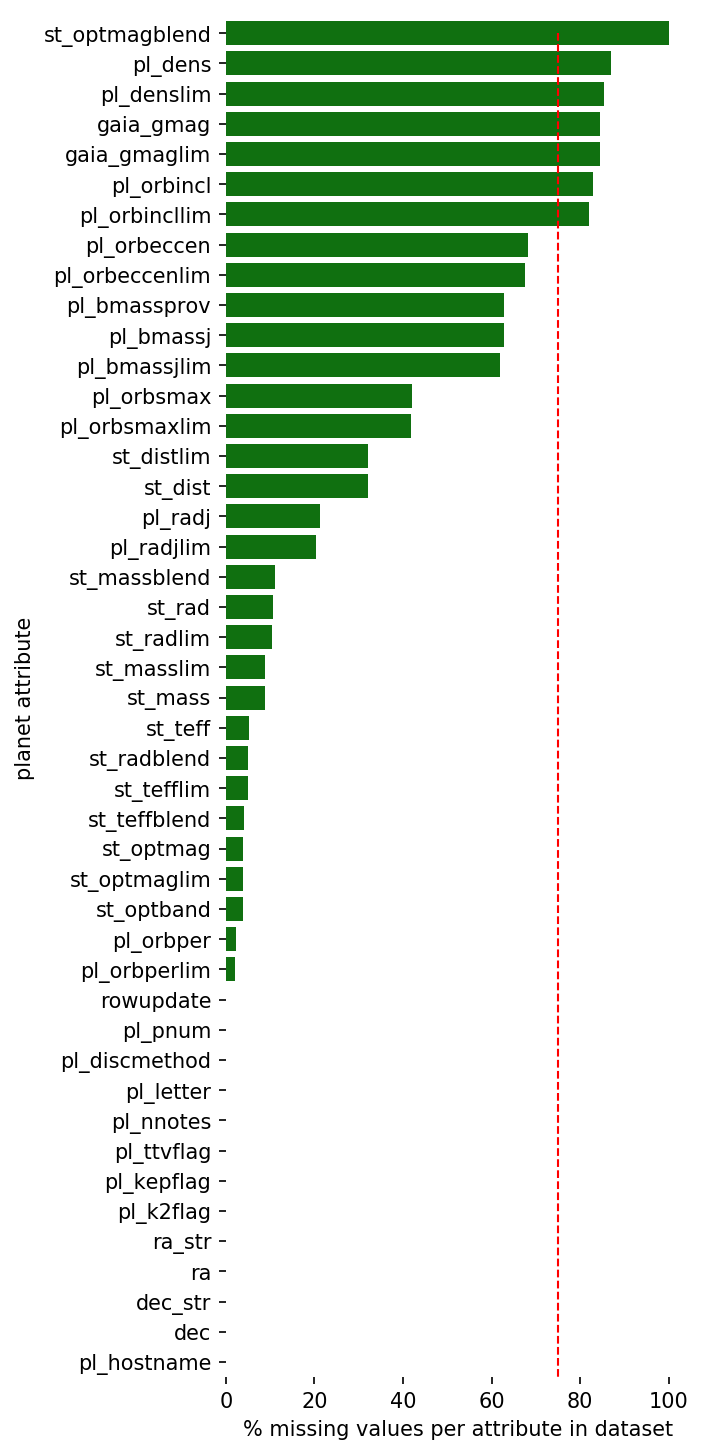

7 out of 45 attributes have been removed from the dataset because they contained too many missing values

The final DataFrame has the following dimensions: 3564 discovered planets, with 38 recorded features


In [8]:
### Plotting NaN counts
nan_sorted = nan.sort_values(ascending=False).to_frame().reset_index()
nan_sorted.columns = ['Column', 'percentNaN']

fig, ax = plt.subplots(figsize=(4,12), dpi=150)
sns.barplot(x="percentNaN", y="Column", data=nan_sorted, color='Green', ax=ax)
ax.set(xlabel="% missing values per attribute in dataset", ylabel="planet attribute")
sns.despine(left=True, bottom=True)
plt.plot([75, 75], [0,70], linewidth=1, ls='--', c='r')
plt.show()

print(str(before[1]-after[1])+' out of '+str(before[1])+' attributes have been removed from the dataset because they contained too many missing values')
print('\nThe final DataFrame has the following dimensions: '+str(planets.shape[0])+' discovered planets, with '+str(planets.shape[1])+' recorded features')

## Exoplanets can be detected using various different methods, some of which are more common than others.

### By far the most common methods are the Transit method:

In [9]:
Image(url = 'https://archive.stsci.edu/prepds/kepler_hlsp/KeplerLightCurves.png')

### and the Radial velocity method:

In [10]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/3/3a/18_Del_b_rv.pdf')

In [11]:
# Turning the names for discovery methods into integers, with the following code
    # 1 = Astrometry
    # 2 = Eclipse Timing Variations
    # 3 = Imaging
    # 4 = Microlensing
    # 5 = Orbital Brightness Modulation
    # 6 = Pulsar Timing
    # 7 = Pulsation Timing Variations
    # 8 = Radial Velocity
    # 9 = Transit
    # 10 = Transit Timing Variations
    
method_code=[]
for i in planets['pl_discmethod']:
    if i == 'Astrometry':
        method_code.append(1)
    elif i == 'Eclipse Timing Variations':
        method_code.append(2)
    elif i == 'Imaging':
        method_code.append(3)
    elif i == 'Microlensing':
        method_code.append(4)
    elif i == 'Orbital Brightness Modulation':
        method_code.append(5)
    elif i == 'Pulsar Timing':
        method_code.append(6)
    elif i == 'Pulsation Timing Variations':
        method_code.append(7)
    elif i == 'Radial Velocity':
        method_code.append(8)
    elif i == 'Transit':
        method_code.append(9)
    elif i == 'Transit Timing Variations':
        method_code.append(10)

## add a feature column "method_code" to the DataFrame
planets['method_code']=method_code

## Creating a new DataFrame with the method code as the index column
planets = planets.set_index(['method_code'])

In [12]:
## filling-in missing values in the remaining columns with median
# for that purpose I am splitting the df into several different dataframes (one for each detection method)
# and fill in missing values in columns with the median for that particular column. Without splitting (and more
# knowledge of coding), the missing values would be replaced with overall median per column 
# (independent of detection method)

df1 = planets.loc[[1],:]
median_values = df1.median(axis=0)
df1 = df1.fillna(median_values, inplace=True)

df2 = planets.loc[[2],:]
median_values = df2.median(axis=0)
df2 = df2.fillna(median_values, inplace=True)

df3 = planets.loc[[3],:]
median_values = df3.median(axis=0)
df3 = df3.fillna(median_values, inplace=True)

df4 = planets.loc[[4],:]
median_values = df4.median(axis=0)
df4 = df4.fillna(median_values, inplace=True)

df5 = planets.loc[[5],:]
median_values = df5.median(axis=0)
df5 = df5.fillna(median_values, inplace=True)

df6 = planets.loc[[6],:]
median_values = df6.median(axis=0)
df6 = df6.fillna(median_values, inplace=True)

df7 = planets.loc[[7],:]
median_values = df7.median(axis=0)
df7 = df7.fillna(median_values, inplace=True)

df8 = planets.loc[[8],:]
median_values = df8.median(axis=0)
df8 = df8.fillna(median_values, inplace=True)

df9 = planets.loc[[9],:]
median_values = df9.median(axis=0)
df9 = df9.fillna(median_values, inplace=True)

df10 = planets.loc[[10],:]
median_values = df10.median(axis=0)
df10 = df10.fillna(median_values, inplace=True)

## putting all median-imputed DataFrames back together into one DataFrame
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
planets = pd.concat(frames)

/Users/gutzmannjj/anaconda3/envs/biof309/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Begin of analysis:

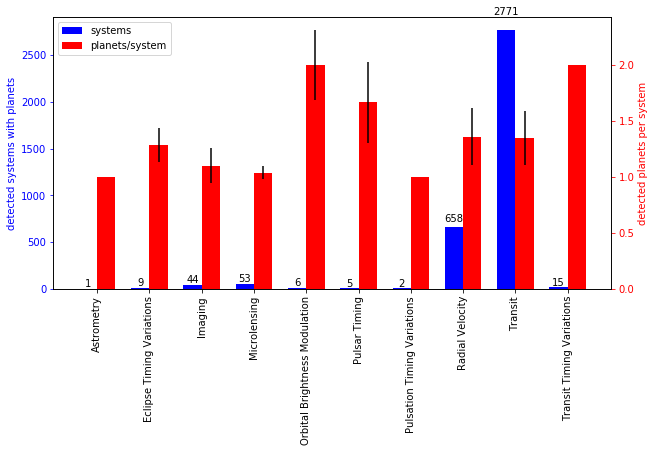

In [13]:
"""
=======================================
Comparing discovery methods for the number of systems they discovered and the number of planets per system
=======================================
"""

#################
# changing the dataframe to be limited to star systems with unique host star names, to calculate the number of planets per star system
un_hoststars=planets.drop_duplicates(subset='pl_hostname')

#################
## counting the number of systems with at least one planet that were detected with a given detection method
un_methods=[]
un_methods_pcount=[]
methods=np.array(planets.loc[:,'pl_discmethod'])
un_methods=(np.unique(methods))
np.delete(un_methods,2)
for i in range(len(un_methods)):
    un_methods_pcount.append(len(planets[(planets['pl_discmethod']==un_methods[i])]))
#################


## counting the number of planets around each star that were detected with a given detection method and calculating the mean number of planets per method
Astrometry_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Astrometry', :]
mean_Astrometry_num=np.mean(Astrometry_num.iloc[:,3])

ETV_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Eclipse Timing Variations', :]
mean_ETV_num=np.mean(ETV_num.iloc[:,3])

Imaging_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Imaging', :]
mean_Imaging_num=np.mean(Imaging_num.iloc[:,3])

Microlensing_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Microlensing', :]
mean_Microlensing_num=np.mean(Microlensing_num.iloc[:,3])

OBM_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Orbital Brightness Modulation', :]
mean_OBM_num=np.mean(OBM_num.iloc[:,3])

PulsarT_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Pulsar Timing', :]
mean_PulsarT_num=np.mean(PulsarT_num.iloc[:,3])

PTV_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Pulsation Timing Variations', :]
mean_PTV_num=np.mean(PTV_num.iloc[:,3])

RV_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Radial Velocity', :]
mean_RV_num=np.mean(RV_num.iloc[:,3])

Transit_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Transit', :]
mean_Transit_num=np.mean(Transit_num.iloc[:,3])

TTV_num=un_hoststars.loc[lambda df: un_hoststars.pl_discmethod == 'Transit Timing Variations', :]
mean_TTV_num=np.mean(TTV_num.iloc[:,3])

# numbers of planets detected with each method
planet_numbers=[Astrometry_num.iloc[:,3],ETV_num.iloc[:,3],Imaging_num.iloc[:,3],Microlensing_num.iloc[:,3],OBM_num.iloc[:,3],PulsarT_num.iloc[:,3],PTV_num.iloc[:,3],RV_num.iloc[:,3],Transit_num.iloc[:,3],TTV_num.iloc[:,3]]

# average number of planets detected with each method
mean_planet_numbers=[mean_Astrometry_num,mean_ETV_num,mean_Imaging_num,mean_Microlensing_num,mean_OBM_num,mean_PulsarT_num,mean_PTV_num,mean_RV_num,mean_Transit_num,mean_TTV_num]

# standard error of the mean (SEM) for number of un_hoststars detected with each method
planet_numbers_SEM=[]
for i in range(len(planet_numbers)):
    planet_numbers_SEM.append((np.std(planet_numbers[i], ddof=1))/np.sqrt(len(planet_numbers)))
#################

#################
## plotting both the number of detected systems and the average number of detected planets/system for each method
x_indexes = np.arange(len(planet_numbers))  # the x locations for the groups
bar_width = 0.35        # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))
rects1 = ax1.bar(x_indexes, un_methods_pcount, bar_width, color='b')
ax2 = ax1.twinx()
rects2 = ax2.bar(x_indexes + bar_width, mean_planet_numbers, bar_width, color='r', yerr=planet_numbers_SEM)

# add some text for labels, title and axes ticks
ax1.set_ylabel('detected systems with planets', color='b')
ax1.tick_params('y', colors='b')
ax2.set_ylabel('detected planets per system', color='r')
ax2.tick_params('y', colors='r')
ax1.set_xticks(x_indexes + bar_width / 2)
ax1.set_xticklabels(un_methods, rotation=90)

ax1.legend((rects1[0], rects2[0]), ('systems', 'planets/system'))

def autolabel(rects): # Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
#################

In [15]:
## Limiting the dataset to the four most often used methods for planet detection
red_planets = planets.loc[[3,4,8,9],:]
removed=len(planets.loc[[1]])+len(planets.loc[[2]])+len(planets.loc[[5]])+len(planets.loc[[6]])+len(planets.loc[[7]])+len(planets.loc[[10]])
print('\n'+str(removed)+' planets have been removed from the dataset, \nand the final DataFrame has the following dimensions: '+str(red_planets.shape[0])+' discovered planets, with '+str(red_planets.shape[1])+' recorded features')


38 planets have been removed from the dataset, 
and the final DataFrame has the following dimensions: 3526 discovered planets, with 38 recorded features


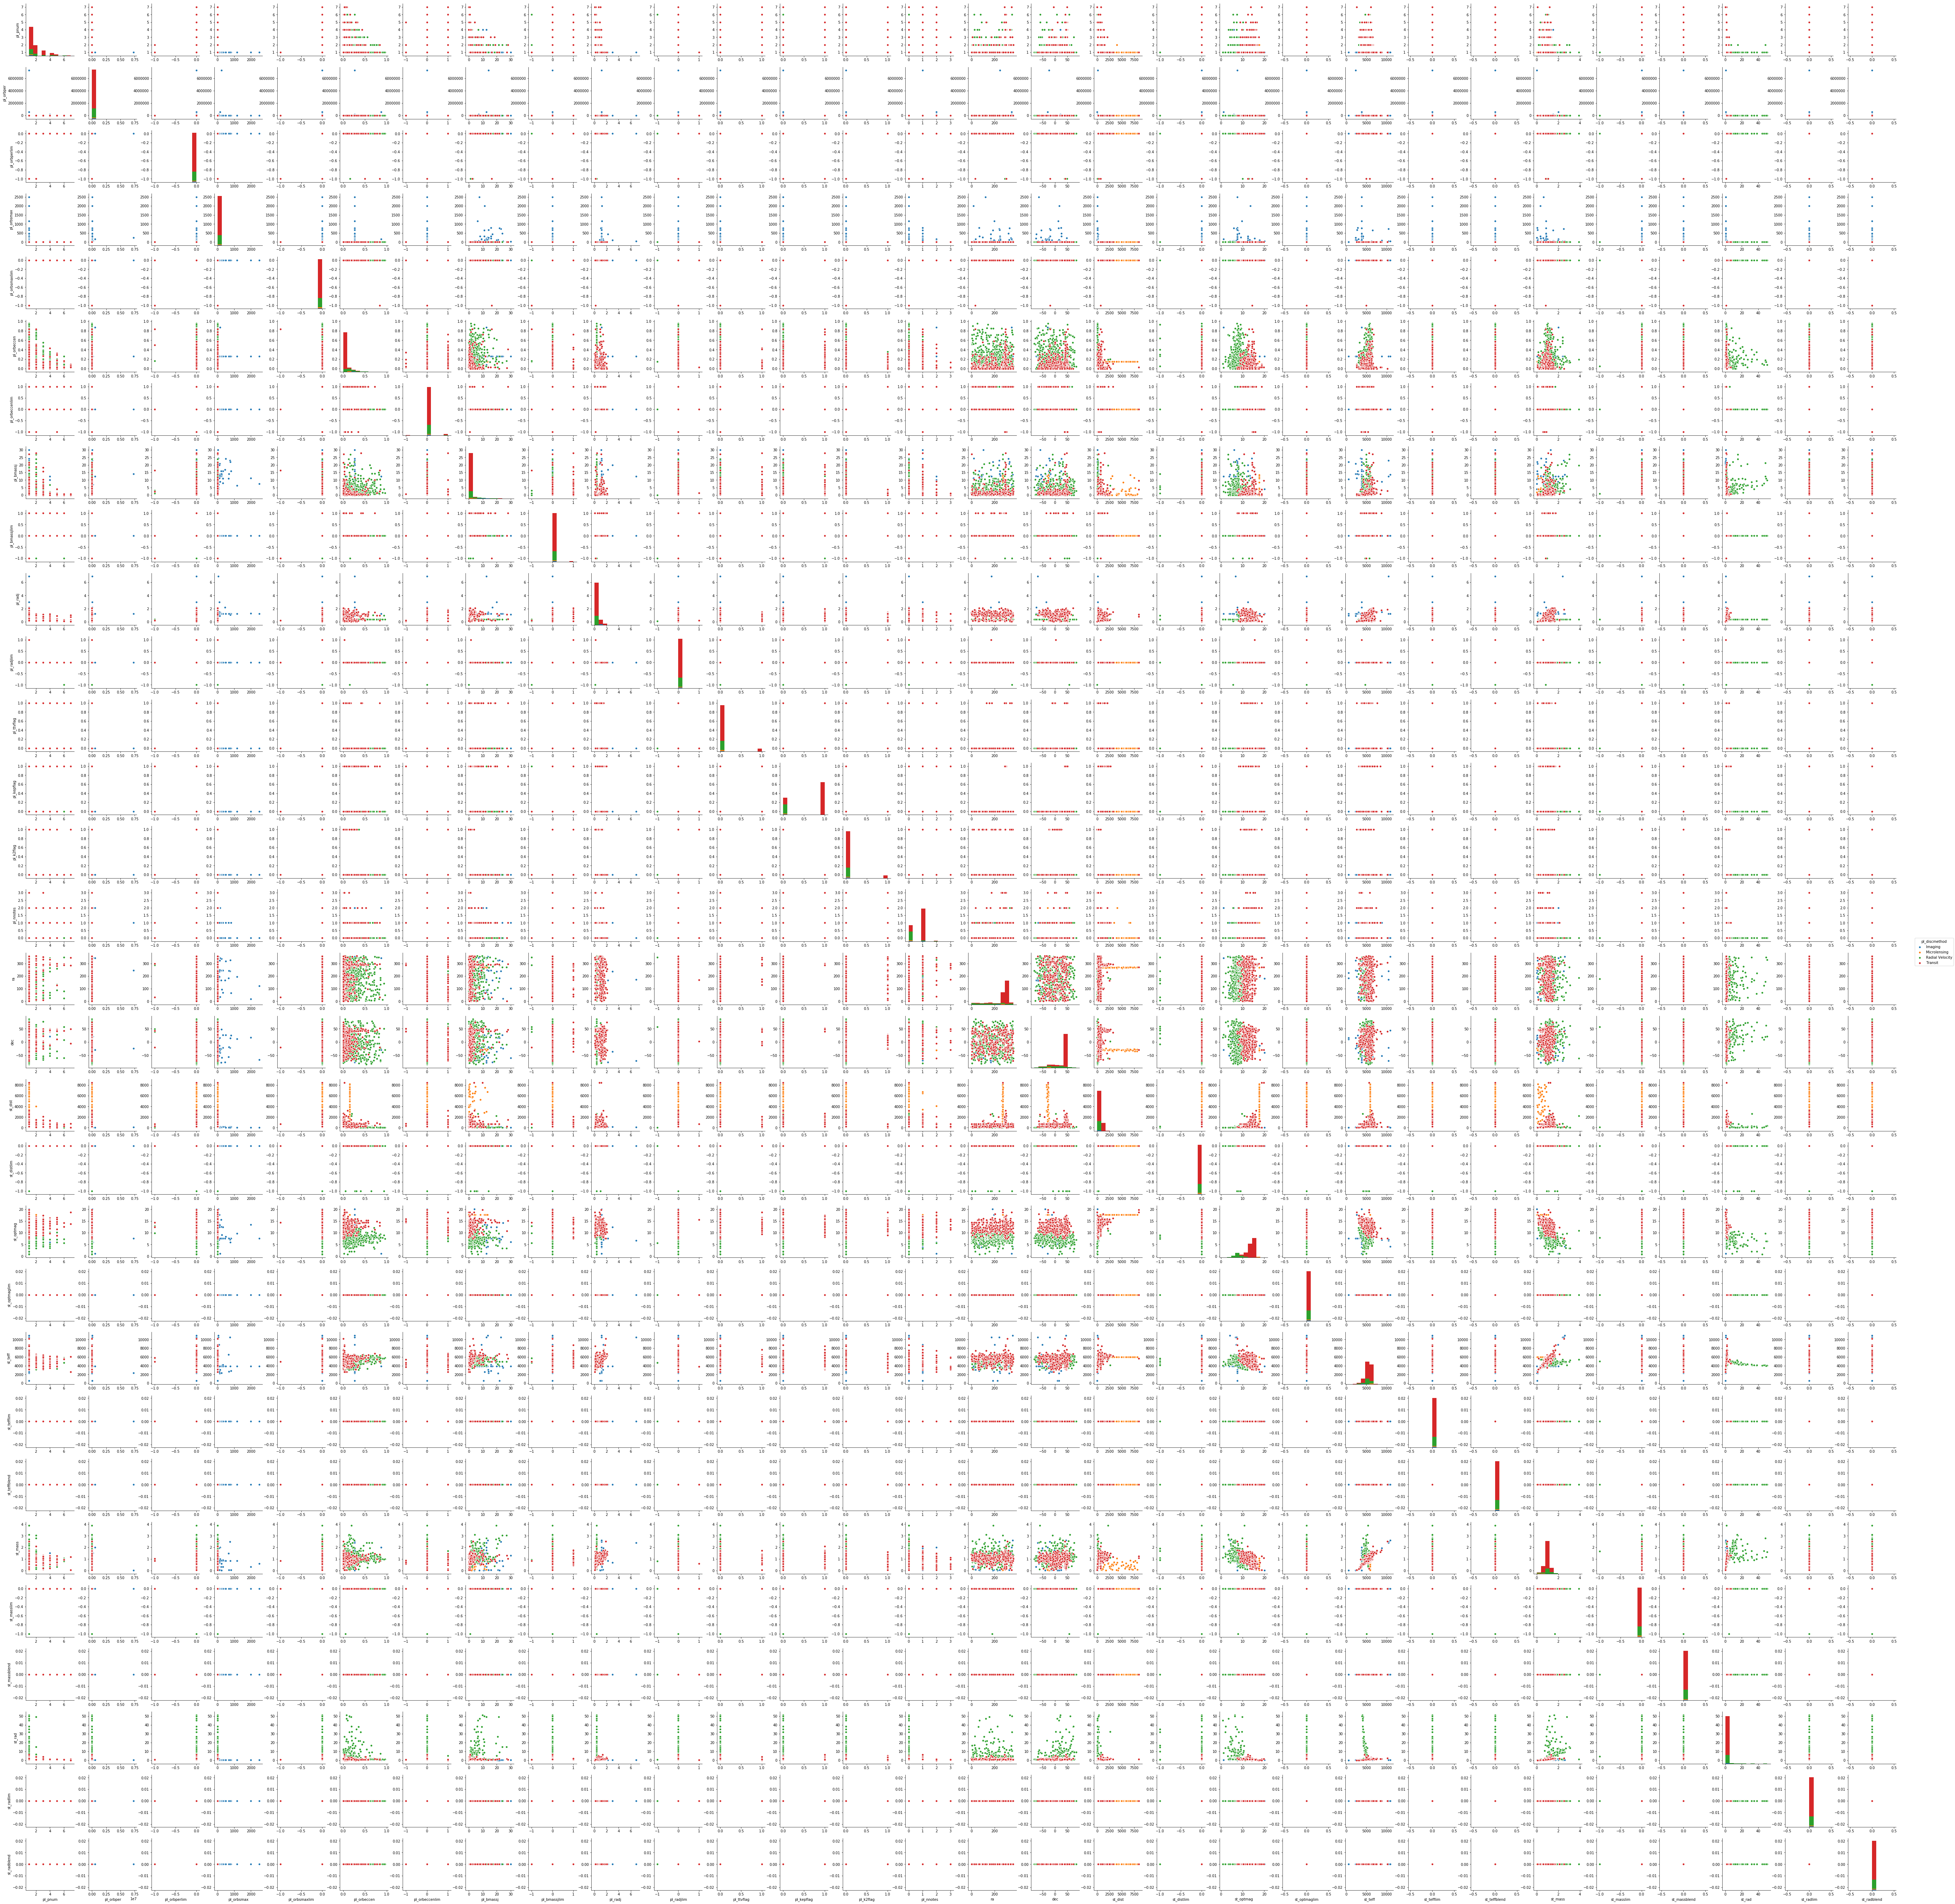

In [17]:
g = sns.pairplot(red_planets, hue='pl_discmethod')
plt.show(g)

# Image(filename = '/Users/gutzmannjj/Work/AnacondaProjects/final_project_exoplanets/pairplot.jpg')

In [ ]:
g = sns.lmplot(data=planets, y='pl_orbper', x='pl_radj' , fit_reg=False, hue='pl_discmethod')
axes = g.axes
axes[0,0].set_ylim(-10000,100000)
plt.show(g)

In [ ]:
# g = sns.pairplot(planets, vars=['method_code', 'pl_pnum', 'pl_orbper', 'pl_bmassj', 'pl_radj', 'st_dist'] , hue='pl_discmethod')
# plt.show(g)

In [ ]:
"""
EVERYTHING BELOW THIS CELL IS STILL IN DEVELOPMENT


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
"""

# all=len(planets)
# b=len(planets[(planets['pl_letter']=='b')])
# c=len(planets[(planets['pl_letter']=='c')])
# d=len(planets[(planets['pl_letter']=='d')])
# e=len(planets[(planets['pl_letter']=='e')])
# f=len(planets[(planets['pl_letter']=='f')])
# g=len(planets[(planets['pl_letter']=='g')])
# h=len(planets[(planets['pl_letter']=='h')])
# print(b)
# print(c)
# print(d)
# print(e)
# print(f)
# print(g)
# print(h)

# all==b+c+d+e+f+g+h


In [ ]:
"""
WORK IN PROGRESS

=======================================
Comparing discovery methods for the number of systems they discovered and the distance of those systems from Earth
=======================================


=======================================
Comparing discovery methods for the number of systems they discovered and the mass of the discovered planet
=======================================


=======================================
Comparing discovery methods for the number of systems they discovered and the asigned letter of the discovered planet
=======================================


plot planets by distance on a map of the galaxy?


"""

#################
## taking out planets with abnormally large or no orbital periods (+- 3*std from mean)
lim_planets=(planets[np.abs(planets.pl_orbper-planets.pl_orbper.mean())<=(3*planets.pl_orbper.std())])

#################
## counting the number of systems with at least one planet that were detected with a given detection method
un_methods=[]
un_methods_pcount=[]
methods=np.array(planets.loc[:,'pl_discmethod'])
un_methods=(np.unique(methods))
for i in range(len(un_methods)):
    un_methods_pcount.append(len(planets[(planets['pl_discmethod']==un_methods[i])]))
#################

## taking out planets with abnormally large or no orbital periods (+- 3*std from mean)
lim_planets=(planets[np.abs(planets.pl_orbper-planets.pl_orbper.mean())<=(3*planets.pl_orbper.std())])

## counting the number of planets around each star that were detected with a given detection method and calculating the mean number of planets per method
orbper_Astrometry_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Astrometry', :]
mean_orbper_Astrometry_num=np.mean(Astrometry_num.iloc[:,4])

orbper_ETV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Eclipse Timing Variations', :]
mean_orbper_ETV_num=np.mean(ETV_num.iloc[:,4])

orbper_Microlensing_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Microlensing', :]
mean_orbper_Microlensing_num=np.mean(Microlensing_num.iloc[:,4])

orbper_OBM_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Orbital Brightness Modulation', :]
mean_orbper_OBM_num=np.mean(OBM_num.iloc[:,4])

orbper_PulsarT_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Pulsar Timing', :]
mean_orbper_PulsarT_num=np.mean(PulsarT_num.iloc[:,4])

orbper_PTV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Pulsation Timing Variations', :]
mean_orbper_PTV_num=np.mean(PTV_num.iloc[:,4])

orbper_RV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Radial Velocity', :]
mean_orbper_RV_num=np.mean(RV_num.iloc[:,4])

orbper_Transit_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Transit', :]
mean_orbper_Transit_num=np.mean(Transit_num.iloc[:,4])

orbper_TTV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Transit Timing Variations', :]
mean_orbper_TTV_num=np.mean(TTV_num.iloc[:,4])

# numbers of planets detected with each method
orbital_periods=[orbper_Astrometry_num.iloc[:,4],orbper_ETV_num.iloc[:,4],orbper_Microlensing_num.iloc[:,4],orbper_OBM_num.iloc[:,4],orbper_PulsarT_num.iloc[:,4],orbper_PTV_num.iloc[:,4],orbper_RV_num.iloc[:,4],orbper_Transit_num.iloc[:,4],orbper_TTV_num.iloc[:,4]]

# average number of planets detected with each method
mean_orbital_periods=[mean_orbper_Astrometry_num,mean_orbper_ETV_num,mean_orbper_Microlensing_num,mean_orbper_OBM_num,mean_orbper_PulsarT_num,mean_orbper_PTV_num,mean_orbper_RV_num,mean_orbper_Transit_num,mean_orbper_TTV_num]

# standard error of the mean (SEM) for number of planets detected with each method
orbper_SEM=[]
for i in range(len(orbital_periods)):
    orbper_SEM.append((np.std(orbital_periods[i], ddof=1))/np.sqrt(len(orbital_periods)))
#################

#################
## plotting both the number of detected systems and the average number of detected planets/system for each method
x_indexes = np.arange(len(orbital_periods))  # the x locations for the groups
bar_width = 0.35        # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))
rects1 = ax1.bar(x_indexes, un_methods_pcount, bar_width, color='b')
ax2 = ax1.twinx()
rects2 = ax2.bar(x_indexes + bar_width, mean_orbital_periods, bar_width, color='r', yerr=orbper_SEM)

# add some text for labels, title and axes ticks
ax1.set_ylabel('detected systems with planets', color='b')
ax1.tick_params('y', colors='b')
ax2.set_ylabel('average orbital period of detected planets [days]', color='r')
ax2.tick_params('y', colors='r')
ax1.set_xticks(x_indexes + bar_width / 2)
ax1.set_xticklabels(un_methods, rotation=90)

ax1.legend((rects1[0], rects2[0]), ('systems', 'orbital periods'))

def autolabel(rects): # Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

plt.show()
#################

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)

In [ ]:
noIm_planets=imputed_planets.query('method_code != 3')

In [ ]:
g = sns.pairplot(noIm_planets, vars=['pl_orbper', 'pl_bmassj', 'pl_radj', 'st_dist'] , hue='pl_discmethod')
plt.show(g)

In [ ]:
data_orbper_dist = imputed_planets.loc[[8,9], ['pl_orbper', 'st_dist','pl_discmethod']]
orbper_dist = sns.lmplot(data=data_orbper_dist, x='st_dist', y='pl_orbper', fit_reg=False, hue='pl_discmethod')
plt.title('Orbital Velocity vs. stellar distance')
plt.show(orbper_dist)
print('\nNote: Orbital period data for the Microlensing subset is only available for '+str((14/53)*100)+'% of discovered \nplanets, all of which were very close. The missing values were added by median imputation.')


data_radj_dist = imputed_planets.loc[[8,9], ['pl_radj', 'st_dist','pl_discmethod']]
radj_dist = sns.lmplot(data=data_radj_dist, x='st_dist', y='pl_radj', fit_reg=False, hue='pl_discmethod')
plt.title("planet radius [in 'Jupiters'] vs. stellar distance")
plt.show(radj_dist)
print('\nNote: Planet radius data for the Microlensing subset is only available for '+str((14/53)*100)+'% of discovered \nplanets, all of which were closer than 200 parsecs. The missing values were added by median imputation.')



In [ ]:
data_orbper_dist = imputed_planets.loc[[4,9], ['pl_orbper', 'st_dist','pl_discmethod']]
orbper_dist = sns.lmplot(data=data_orbper_dist, x='st_dist', y='pl_orbper', fit_reg=False, hue='pl_discmethod')
plt.title('Orbital Velocity vs. stellar distance')
plt.show(orbper_dist)
print('\nNote: Orbital period data for the Microlensing subset is only available for '+str((14/53)*100)+'% of discovered \nplanets, all of which were very close. The missing values were added by median imputation.')


data_radj_dist = imputed_planets.loc[[4,9], ['pl_radj', 'st_dist','pl_discmethod']]
radj_dist = sns.lmplot(data=data_radj_dist, x='st_dist', y='pl_radj', fit_reg=False, hue='pl_discmethod')
plt.title("planet radius [in 'Jupiters'] vs. stellar distance")
plt.show(radj_dist)
print('\nNote: Planet radius data for the Microlensing subset is only available for '+str((14/53)*100)+'% of discovered \nplanets, all of which were closer than 200 parsecs. The missing values were added by median imputation.')


In [ ]:
g = sns.lmplot(data=noIm_planets, y='pl_radj', x='st_dist' , fit_reg=False, hue='pl_discmethod')
plt.show(g)

In [ ]:
g = sns.lmplot(data=noIm_planets, y='pl_radj', x='pl_bmassj' , fit_reg=False, hue='pl_discmethod')
plt.show(g)

In [ ]:
imputed_planets.head(20)

In [ ]:
"""
=======================================
Comparing discovery methods for the number of systems they discovered and the orbital period of the planets around their host star
=======================================
"""

#################
## taking out planets with abnormally large or small orbital periods (+- 3*std from mean)
lim_planets=(planets[np.abs(planets.pl_orbper-planets.pl_orbper.mean())<=(3*planets.pl_orbper.std())])

#################
## counting the number of systems with at least one planet that were detected with a given detection method
un_methods=[]
lim_un_methods_pcount=[]
methods=np.array(planets.loc[:,'pl_discmethod'])
un_methods=(np.unique(methods))
lim_un_methods=np.delete(un_methods,2) # removed Imaging from method index, because the orbital periods detected with this method are all much much larger than with any of the other methods
for i in range(len(lim_un_methods)):
    lim_un_methods_pcount.append(len(planets[(planets['pl_discmethod']==lim_un_methods[i])]))
#################

## taking out planets with abnormally large or no orbital periods (+- 3*std from mean)
lim_planets=(planets[np.abs(planets.pl_orbper-planets.pl_orbper.mean())<=(3*planets.pl_orbper.std())])

## counting the number of planets around each star that were detected with a given detection method and calculating the mean number of planets per method
orbper_Astrometry_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Astrometry', :]
mean_orbper_Astrometry_num=np.mean(orbper_Astrometry_num.iloc[:,4])

orbper_ETV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Eclipse Timing Variations', :]
mean_orbper_ETV_num=np.mean(orbper_ETV_num.iloc[:,4])

orbper_Microlensing_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Microlensing', :]
mean_orbper_Microlensing_num=np.mean(orbper_Microlensing_num.iloc[:,4])

orbper_OBM_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Orbital Brightness Modulation', :]
mean_orbper_OBM_num=np.mean(orbper_OBM_num.iloc[:,4])

orbper_PulsarT_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Pulsar Timing', :]
mean_orbper_PulsarT_num=np.mean(orbper_PulsarT_num.iloc[:,4])

orbper_PTV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Pulsation Timing Variations', :]
mean_orbper_PTV_num=np.mean(orbper_PTV_num.iloc[:,4])

orbper_RV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Radial Velocity', :]
mean_orbper_RV_num=np.mean(orbper_RV_num.iloc[:,4])

orbper_Transit_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Transit', :]
mean_orbper_Transit_num=np.mean(orbper_Transit_num.iloc[:,4])

orbper_TTV_num=lim_planets.loc[lambda df: lim_planets.pl_discmethod == 'Transit Timing Variations', :]
mean_orbper_TTV_num=np.mean(orbper_TTV_num.iloc[:,4])

# numbers of planets detected with each method
orbital_periods=[orbper_Astrometry_num.iloc[:,4],orbper_ETV_num.iloc[:,4],orbper_Microlensing_num.iloc[:,4],orbper_OBM_num.iloc[:,4],orbper_PulsarT_num.iloc[:,4],orbper_PTV_num.iloc[:,4],orbper_RV_num.iloc[:,4],orbper_Transit_num.iloc[:,4],orbper_TTV_num.iloc[:,4]]

# average number of planets detected with each method
mean_orbital_periods=[mean_orbper_Astrometry_num,mean_orbper_ETV_num,mean_orbper_Microlensing_num,mean_orbper_OBM_num,mean_orbper_PulsarT_num,mean_orbper_PTV_num,mean_orbper_RV_num,mean_orbper_Transit_num,mean_orbper_TTV_num]

# standard error of the mean (SEM) for number of planets detected with each method
orbper_SEM=[]
for i in range(len(orbital_periods)):
    orbper_SEM.append((np.std(orbital_periods[i], ddof=1))/np.sqrt(len(orbital_periods)))
#################

#################
## plotting both the number of detected systems and the average number of detected planets/system for each method
x_indexes = np.arange(len(orbital_periods))  # the x locations for the groups
bar_width = 0.35        # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))
rects1 = ax1.bar(x_indexes, lim_un_methods_pcount, bar_width, color='b')
ax2 = ax1.twinx()
rects2 = ax2.bar(x_indexes + bar_width, mean_orbital_periods, bar_width, color='r', yerr=orbper_SEM)

# add some text for labels, title and axes ticks
ax1.set_ylabel('detected systems with planets', color='b')
ax1.tick_params('y', colors='b')
ax2.set_ylabel('average orbital period of detected planets [days]', color='r')
ax2.tick_params('y', colors='r')
ax1.set_xticks(x_indexes + bar_width / 2)
ax1.set_xticklabels(un_methods, rotation=90)

ax1.legend((rects1[0], rects2[0]), ('systems', 'orbital periods'))

def autolabel(rects): # Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

plt.show()
#################